## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 10$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [3]:
data = DataPreparation()

In [29]:
size_df = 1000
noise = 'vhigh'
data.sample_params_from_prior(size_df, 42)

(1000, 2) [[ 3.74540119  9.01428613]
 [ 7.31993942  1.97316968]
 [ 1.5601864  -6.88010959]
 ...
 [ 7.51375086  3.13910313]
 [ 9.56614621 -8.62083967]
 [ 0.57054721 -4.35625851]]


In [30]:
if noise == 'low':
    sigma = 1
if noise == 'medium':
    sigma = 5
if noise == 'high':
    sigma = 10
if noise == 'vhigh':
    sigma = 100
data.simulate_data(data.params,
                   sigma, 
                   'linear_homogeneous'
                    )

Linear simulation data generated.


Let's take a look at this simulated dataset.

In [31]:
print(np.shape(data.output[0]))
data.output

torch.Size([101])


tensor([[ 5.8686e+01,  1.5270e+02, -5.1013e+01,  ...,  3.4595e+02,
          5.1542e+02,  4.8661e+02],
        [-1.1853e+01,  1.0176e+02,  2.1612e+00,  ...,  6.6001e+02,
          6.7265e+02,  6.1843e+02],
        [ 5.7889e+01,  6.4311e-01, -8.3002e+01,  ...,  2.9303e+02,
          1.4449e+02,  2.0668e+02],
        ...,
        [ 6.7223e+01, -7.7535e+01, -1.0601e+02,  ...,  7.2450e+02,
          7.8792e+02,  7.2920e+02],
        [-6.5739e+01, -1.5361e+01,  4.3929e+01,  ...,  8.8305e+02,
          9.1732e+02,  9.3354e+02],
        [ 5.2902e+01, -7.8276e+01, -1.8741e+01,  ...,  6.1675e+00,
          6.4134e+01, -5.8998e+01]])

In [32]:
data.params

array([[ 3.74540119,  9.01428613],
       [ 7.31993942,  1.97316968],
       [ 1.5601864 , -6.88010959],
       ...,
       [ 7.51375086,  3.13910313],
       [ 9.56614621, -8.62083967],
       [ 0.57054721, -4.35625851]])

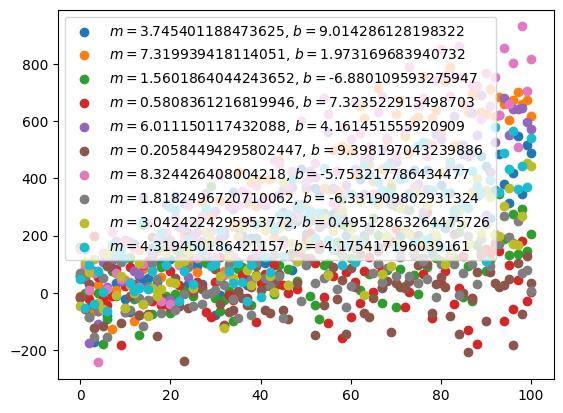

In [33]:
plt.clf()
for i in range(10):
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
plt.legend()
plt.show()
    

In [34]:
# now make it into a dataframe
dict = data.get_dict()
dict

{'params': array([[ 3.74540119,  9.01428613],
        [ 7.31993942,  1.97316968],
        [ 1.5601864 , -6.88010959],
        ...,
        [ 7.51375086,  3.13910313],
        [ 9.56614621, -8.62083967],
        [ 0.57054721, -4.35625851]]),
 'inputs': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 'output': tensor([[ 5.8686e+01,  1.5270e+02, -5.1013e+01,  .

## Save the data to h5

In [35]:
saver = MyDataLoader()

In [36]:
# save the dataframe
filepath = '../data/'
saver.save_data_h5('linear_sigma_'+str(sigma)+'_size_'+str(size_df), dict)